## Load Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# to draw graph in notebook
%matplotlib inline

#solve problem about korean minus font in graph
mpl.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

In [2]:
train =pd.read_csv("data/train.csv",parse_dates=["datetime"])
train.shape

(10886, 12)

In [3]:
test=pd.read_csv("data/test.csv",parse_dates=["datetime"])
test.shape

(6493, 9)

## Feature Engineering

In [4]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second
train.shape

(10886, 18)

In [5]:
train["dayofweek"]=train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [6]:
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["hour"]=test["datetime"].dt.hour
test["minute"]=test["datetime"].dt.minute
test["second"]=test["datetime"].dt.second
test["dayofweek"]=test["datetime"].dt.dayofweek
test["dayofweek"]=test["datetime"].dt.dayofweek
test.shape

(6493, 16)

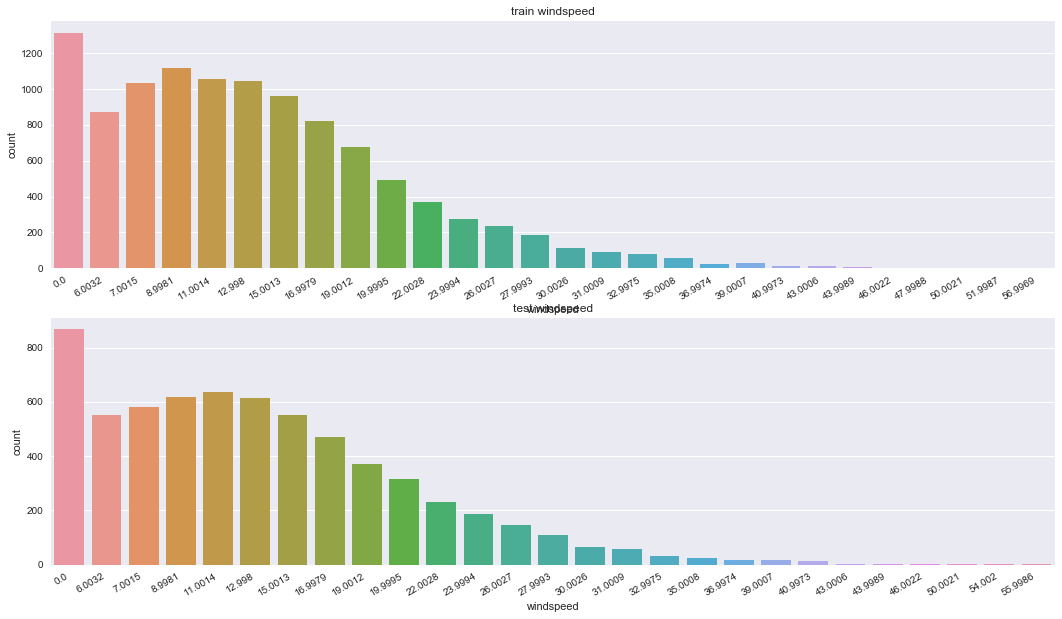

In [7]:
#widdspeed

fig, axes =plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30,ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30,ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])




I think zero values were recorded when there were no data.
so i should take machine learning method to predict the values of zero value in windspeed.

In [8]:
# separate windspeed is 0 and windspeed is not 0
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)


(1313, 19)
(9573, 19)


In [13]:
# put on data using machine learing 

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    #separate data
    dataWind0 = data.loc[train['windspeed'] == 0]
    dataWindNot0 = train.loc[train['windspeed'] != 0]
    
    # choice feature to predict windspeed
    wCol=["season","weather","humidity","month","temp","year","atemp"]   
    
    # change type of data windspeed is not 0 to string  
    dataWindNot0["windspeed"]= dataWindNot0["windspeed"].astype("str")
    
    # using randomforestclassifier
    rfModel_wind=RandomForestClassifier()
    
    
    #be learned windspeed underlying feature values in wCol data 
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0["windspeed"])
    
    #predict windspeed for data with 0 recode, based on learned values
    wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
    
    # to compare values
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    # predicted values put on data 
    predictWind0["windspeed"]=wind0Values
    
    # to combine dataframe
    data= predictWindNot0.append(predictWind0)
    
    # datatype of windspeed assign type " float"
    data["windspeed"]=data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    
    return data
    

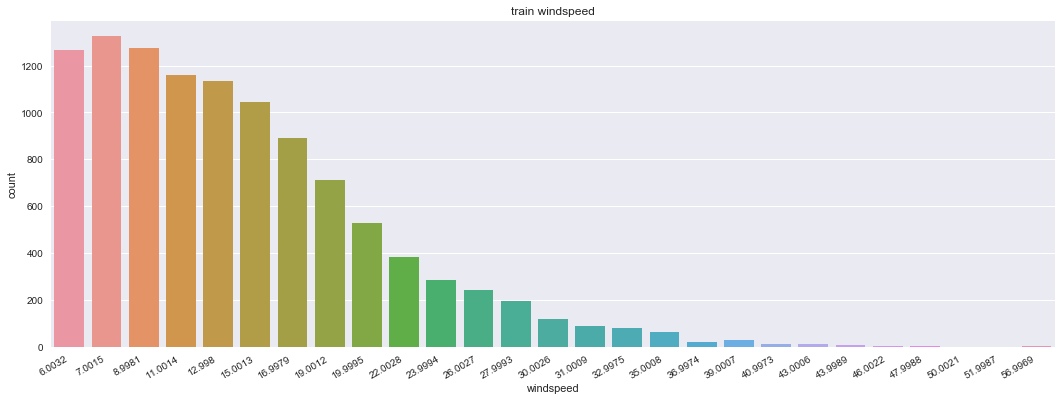

In [14]:
train = predict_windspeed(train)

fig, ax1= plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30,ha='right')
ax1.set(ylabel='Count', title = 'train windspeed')
sns.countplot(data=train,x="windspeed",ax=ax1)

## Feature Selection
- have to divide signal and noise
- a large number of features don't always give good performance 
- should to add and change features one at a time, and remove any poorly performing features